## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [124]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
import numpy as np
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
#opening connection & cursor
conn = psycopg2.connect(
                            host="lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com",
                            database="mid_term_project",
                            user="lhl_student",
                            password="lhl_student")
cursor = conn.cursor()
test2 = f"SELECT * FROM flights WHERE arr_delay IS NOT NULL AND weather_delay IS NOT NULL AND arr_delay < 200 AND EXTRACT(month from CAST(fl_date as date)) = {i} AND EXTRACT(year from CAST(fl_date as date)) = 2019 LIMIT 10000;"

def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table

df = pd.DataFrame()

for i in range(1, 13):
    if i == 1:
        test2 = f"SELECT * FROM flights WHERE arr_delay IS NOT NULL AND weather_delay IS NOT NULL AND arr_delay < 200 AND EXTRACT(month from CAST(fl_date as date)) = {i} AND EXTRACT(year from CAST(fl_date as date)) = 2019 LIMIT 10000;"
        df = create_pandas_table(test2)
    else:
        test2 = f"SELECT * FROM flights WHERE arr_delay IS NOT NULL AND weather_delay IS NOT NULL AND arr_delay < 200 AND EXTRACT(month from CAST(fl_date as date)) = {i} AND EXTRACT(year from CAST(fl_date as date)) = 2019 LIMIT 10000;"
        test_pd_table = create_pandas_table(test2)
        df = pd.concat([df, test_pd_table]) 

# remember to close connection to allow for others to use the bandwidth
cursor.close()
conn.close()
df.head() # show table querried

2
3
4
5
6
7
8
9
10
11
12


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,AA,AA_CODESHARE,AA,5658,OH,N582NN,5658,12448,JAN,...,562.0,15.0,0.0,1.0,0.0,0.0,None,NaN,NaN,None
1,2019-01-01,AA,AA_CODESHARE,AA,5622,OH,N215PS,5622,11278,DCA,...,298.0,68.0,0.0,0.0,0.0,0.0,1728.0,16.0,16.0,None
2,2019-01-01,AA,AA_CODESHARE,AA,5622,OH,N215PS,5622,15096,SYR,...,298.0,12.0,0.0,5.0,0.0,49.0,None,NaN,NaN,None
3,2019-01-01,AA,AA_CODESHARE,AA,5629,OH,N589NN,5629,11057,CLT,...,333.0,62.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
4,2019-01-01,AA,AA_CODESHARE,AA,5680,OH,N244PS,5680,11278,DCA,...,653.0,0.0,0.0,0.0,0.0,48.0,None,NaN,NaN,None


In [148]:
df.to_csv('flights2.csv')

In [96]:
df.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                    0
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                   0
taxi_out                    0
wheels_off                  0
wheels_on                   0
taxi_in                     0
crs_arr_time                0
arr_time                    0
arr_delay                   0
cancelled                   0
cancellation_code      120000
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                    0
flights                     0
distance                    0
carrier_de

In [98]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [99]:
df.shape

(120000, 42)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [100]:
df['arr_delay'].agg(['max', 'min', 'mean', 'std', 'median'])

max       199.000000
min        15.000000
mean       54.965633
std        41.262710
median     40.000000
Name: arr_delay, dtype: float64

In [101]:
df['arr_delay'].sort_values()

7907     15.0
2670     15.0
5185     15.0
2677     15.0
5183     15.0
        ...  
8577    199.0
7151    199.0
7328    199.0
8573    199.0
1326    199.0
Name: arr_delay, Length: 120000, dtype: float64

/Users/emrebolcakan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

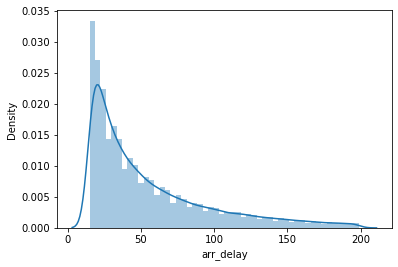

In [125]:
sns.distplot(df.arr_delay)

In [103]:
stat, p = shapiro(df.arr_delay)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.836, p=0.000
Probably not Gaussian


/Users/emrebolcakan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [104]:
tset, pval = ttest_1samp(df.arr_delay, 0)

In [105]:
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.0
 we are rejecting null hypothesis


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [106]:
df.sort_values('fl_date')

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,AA,AA_CODESHARE,AA,5658,OH,N582NN,5658,12448,JAN,...,562.0,15.0,0.0,1.0,0.0,0.0,None,NaN,NaN,None
2781,2019-01-01,F9,F9,F9,1115,F9,N715FR,1115,15304,TPA,...,927.0,48.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
2782,2019-01-01,F9,F9,F9,2015,F9,N715FR,2015,11042,CLE,...,1824.0,5.0,0.0,11.0,0.0,43.0,None,NaN,NaN,None
2783,2019-01-01,F9,F9,F9,1447,F9,N716FR,1447,15304,TPA,...,1011.0,3.0,0.0,0.0,0.0,84.0,None,NaN,NaN,None
2784,2019-01-01,F9,F9,F9,2276,F9,N716FR,2276,11986,GRR,...,1041.0,0.0,0.0,14.0,0.0,84.0,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,2019-12-02,WN,WN,WN,1932,WN,N7857B,1932,14893,SMF,...,647.0,20.0,0.0,0.0,0.0,1.0,None,NaN,NaN,None
8464,2019-12-02,WN,WN,WN,2450,WN,N407WN,2450,14893,SMF,...,647.0,19.0,0.0,0.0,0.0,17.0,None,NaN,NaN,None
8465,2019-12-02,WN,WN,WN,1629,WN,N215WN,1629,14893,SMF,...,480.0,20.0,0.0,0.0,0.0,24.0,None,NaN,NaN,None
8268,2019-12-02,WN,WN,WN,1346,WN,N8504G,1346,13796,OAK,...,1903.0,21.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None


In [107]:
df.fl_date = df.fl_date.apply(pd.to_datetime)

In [108]:
df.fl_date.value_counts()  

2019-12-01    7694
2019-08-01    6982
2019-05-02    6613
2019-04-01    6244
2019-03-01    6055
2019-01-02    5559
2019-02-01    5195
2019-06-02    4729
2019-01-01    4183
2019-07-15    4180
2019-03-02    3945
2019-07-14    3850
2019-11-01    3263
2019-06-01    3200
2019-08-02    3018
2019-09-02    3011
2019-05-01    2929
2019-10-03    2858
2019-09-03    2719
2019-10-02    2687
2019-09-04    2509
2019-12-02    2306
2019-02-02    2268
2019-10-04    2267
2019-10-01    2188
2019-04-02    2186
2019-06-03    2071
2019-11-03    2050
2019-11-04    1998
2019-02-03    1849
2019-11-02    1841
2019-04-03    1570
2019-09-01    1523
2019-07-16    1079
2019-07-13     891
2019-11-05     848
2019-02-04     688
2019-05-03     458
2019-01-03     258
2019-09-05     238
Name: fl_date, dtype: int64

In [109]:
df.groupby(df.fl_date.dt.month)['arr_delay'].mean()

fl_date
1     48.3841
2     56.3148
3     54.4891
4     55.4513
5     57.8667
6     58.5824
7     54.4715
8     58.4411
9     59.1694
10    49.1133
11    47.9077
12    59.3962
Name: arr_delay, dtype: float64

In [110]:
np.std(df.groupby(df.fl_date.dt.month)['arr_delay'].mean())

4.0904952494234195

In [152]:
sns.dist(df.fl_date.dt.month.value_counts())

AttributeError: module 'seaborn' has no attribute 'dist'

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [54]:
df.weather_delay.isna().value_counts()

True     96189
False    23811
Name: weather_delay, dtype: int64

In [55]:
df.weather_delay.value_counts()

0.0      22655
1.0         40
2.0         32
9.0         32
15.0        31
         ...  
127.0        1
126.0        1
164.0        1
94.0         1
136.0        1
Name: weather_delay, Length: 150, dtype: int64

In [93]:
df['weather_delay'].agg(['max', 'min', 'mean', 'std', 'median'])

max       199.000000
min         0.000000
mean        2.291733
std        12.991763
median      0.000000
Name: weather_delay, dtype: float64

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [128]:
df[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,duration,duration_diff
0,2019-01-01,AA,AA_CODESHARE,AA,5658,OH,N582NN,5658,12448,JAN,...,0.0,1.0,0.0,0.0,None,NaN,NaN,None,292.0,-1.0
1,2019-01-01,AA,AA_CODESHARE,AA,5622,OH,N215PS,5622,11278,DCA,...,0.0,0.0,0.0,0.0,1728.0,16.0,16.0,None,111.0,4.0
2,2019-01-01,AA,AA_CODESHARE,AA,5622,OH,N215PS,5622,15096,SYR,...,0.0,5.0,0.0,49.0,None,NaN,NaN,None,176.0,-5.0
3,2019-01-01,AA,AA_CODESHARE,AA,5629,OH,N589NN,5629,11057,CLT,...,0.0,0.0,0.0,0.0,None,NaN,NaN,None,-2335.0,5.0
4,2019-01-01,AA,AA_CODESHARE,AA,5680,OH,N244PS,5680,11278,DCA,...,0.0,0.0,0.0,48.0,None,NaN,NaN,None,112.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-12-02,AA,AA_CODESHARE,AA,4555,YX,N417YX,4555,12953,LGA,...,0.0,66.0,0.0,128.0,None,NaN,NaN,None,286.0,-66.0
9996,2019-12-02,AA,AA_CODESHARE,AA,4561,YX,N427YX,4561,12953,LGA,...,0.0,29.0,0.0,48.0,None,NaN,NaN,None,204.0,-29.0
9997,2019-12-02,AA,AA_CODESHARE,AA,4561,YX,N427YX,4561,14524,RIC,...,0.0,30.0,0.0,128.0,None,NaN,NaN,None,189.0,-21.0
9998,2019-12-02,AA,AA_CODESHARE,AA,4567,YX,N122HQ,4567,12953,LGA,...,0.0,0.0,0.0,58.0,None,NaN,NaN,None,201.0,13.0


In [39]:
df[(df['dep_delay'] > 0)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
1,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,157.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,10529,BDL,...,313.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,11278,DCA,...,313.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
8,2019-01-01,AA,AA_CODESHARE,AA,5615,OH,N703PS,5615,11057,CLT,...,91.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
16,2019-01-01,AA,AA_CODESHARE,AA,5647,OH,N712PS,5647,11057,CLT,...,333.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-12-01,WN,WN,WN,5994,WN,N483WN,5994,15016,STL,...,259.0,14.0,0.0,0.0,0.0,11.0,None,NaN,NaN,None
9995,2019-12-01,WN,WN,WN,4796,WN,N401WN,4796,15016,STL,...,440.0,0.0,0.0,0.0,0.0,59.0,None,NaN,NaN,None
9997,2019-12-01,WN,WN,WN,2609,WN,N8502Z,2609,15016,STL,...,1057.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9998,2019-12-01,WN,WN,WN,3137,WN,N8654B,3137,15016,STL,...,1057.0,133.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None


In [40]:
df[(df['arr_delay'] > 0)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
2,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,10529,BDL,...,313.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,11278,DCA,...,313.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
6,2019-01-01,AA,AA_CODESHARE,AA,5613,OH,N242JS,5613,11278,DCA,...,310.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
7,2019-01-01,AA,AA_CODESHARE,AA,5615,OH,N703PS,5615,10431,AVL,...,91.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
8,2019-01-01,AA,AA_CODESHARE,AA,5615,OH,N703PS,5615,11057,CLT,...,91.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,2019-12-01,WN,WN,WN,4885,WN,N489WN,4885,15016,STL,...,259.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9994,2019-12-01,WN,WN,WN,5994,WN,N483WN,5994,15016,STL,...,259.0,14.0,0.0,0.0,0.0,11.0,None,NaN,NaN,None
9995,2019-12-01,WN,WN,WN,4796,WN,N401WN,4796,15016,STL,...,440.0,0.0,0.0,0.0,0.0,59.0,None,NaN,NaN,None
9998,2019-12-01,WN,WN,WN,3137,WN,N8654B,3137,15016,STL,...,1057.0,133.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None


In [41]:
df[(df['dep_delay'] > 0) & (df['arr_delay'] < 0)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
1,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,157.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
36,2019-01-01,AA,AA_CODESHARE,AA,5672,OH,N550NN,5672,12264,IAD,...,322.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
41,2019-01-01,AA,AA_CODESHARE,AA,5677,OH,N576NN,5677,11423,DSM,...,815.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
62,2019-01-01,AA,AA_CODESHARE,AA,5703,OH,N506AE,5703,11057,CLT,...,350.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
65,2019-01-01,AA,AA_CODESHARE,AA,5707,OH,N710PS,5707,11996,GSP,...,75.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943,2019-12-01,WN,WN,WN,4712,WN,N446WN,4712,14908,SNA,...,342.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9962,2019-12-01,WN,WN,WN,2883,WN,N8522P,2883,15016,STL,...,1047.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9988,2019-12-01,WN,WN,WN,4925,WN,N557WN,4925,15016,STL,...,770.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9989,2019-12-01,WN,WN,WN,4931,WN,N734SA,4931,15016,STL,...,770.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


#### **Task 6**: How many states cover 50% of US air traffic? 

In [31]:
df.dest_city_name.value_counts().head(17)

Chicago, IL              7003
Atlanta, GA              5584
Denver, CO               4569
Dallas/Fort Worth, TX    4241
Houston, TX              4039
Los Angeles, CA          3851
New York, NY             3759
Washington, DC           3241
Charlotte, NC            3234
Phoenix, AZ              3172
Las Vegas, NV            3096
San Francisco, CA        2539
Seattle, WA              2523
Orlando, FL              2404
Detroit, MI              2363
Baltimore, MD            2270
Minneapolis, MN          2215
Name: dest_city_name, dtype: int64

In [149]:
origin_state= df.origin_city_name.str.split(pat=", ",expand=True).iloc[:,1]


In [139]:
destination_state= df.dest_city_name.str.split(pat=", ",expand=True).iloc[:,1]


In [ ]:
air_traffic= pd.concat(origin_state, destination_state)

In [150]:
air_traffic.value_counts().head().sum()/air_traffic.value_counts().sum()*100

71.81074194837892

In [151]:
air_traffic.value_counts().head()

1 
TX    143529820
CA    135701332
IL     85224936
FL     84120960
NY     63483480
dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [146]:
df['duration_diff'] = df.crs_elapsed_time - df.actual_elapsed_time

In [147]:
df[df['dep_delay'] > 0]['duration_diff'].mean()

-0.5765562486964106

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [42]:
df.dest_city_name.value_counts().head(10)

Chicago, IL              7003
Atlanta, GA              5584
Denver, CO               4569
Dallas/Fort Worth, TX    4241
Houston, TX              4039
Los Angeles, CA          3851
New York, NY             3759
Washington, DC           3241
Charlotte, NC            3234
Phoenix, AZ              3172
Name: dest_city_name, dtype: int64

In [43]:
df.origin_city_name.value_counts().head(10).sum()

43273

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?